In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from html import unescape


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)


In [ ]:
%%sql


In [3]:
thread_df = pd.read_csv("r_canada_dataset/canada_subreddit_threads.csv")
comments_df = pd.read_csv("r_canada_dataset/canada_subreddit_comments.csv")

In [4]:
def remove_carriage_returns(x):
     return x.replace('\n', ' ').replace('\r\n', ' ')

def unify_multiple_whitespaces(x):
    """replace multiple whitespaces with just one"""
    return re.sub(' {2,}', ' ', str(x))

def clean_html(x):
    """Unescape string then remove html parts"""
    soup = BeautifulSoup(unescape(str(x)), 'lxml')
    return soup.text

def remove_urls(x):
    """remove urls from string"""
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x))
    return cleaned_string

def remove_emojis(x):
    """remove known emojis and smileys"""
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', str(x))

def normalize_reddit_text(x: str) -> str:
    x = str(x)
    if x.lower() in {"[deleted]", "[removed]", "nan", "none"}:
        return ""
    x = x.replace("\r\n", " ").replace("\n", " ").replace("\r", " ")
    x = clean_html(x)
    x = remove_urls(x)
    x = remove_emojis(x)
    x = unify_multiple_whitespaces(x).strip()
    return x

In [5]:
thread_df["link_flair_text"] = thread_df["link_flair_text"].fillna("[No Flair]")
thread_df["link_flair_text"] = thread_df["link_flair_text"].str.strip()
thread_df["link_flair_text"] = thread_df["link_flair_text"].str.lower()

In [6]:
thread_df['title_and_selftext'] = thread_df['title'].fillna("") + "." + thread_df['selftext'].fillna("")

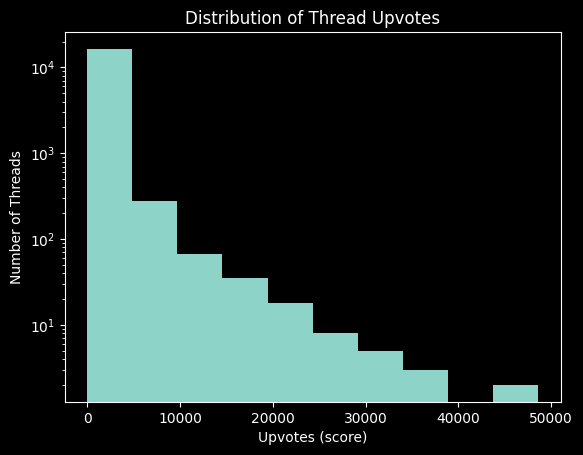

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
thread_df = pd.read_csv("r_canada_dataset/canada_subreddit_threads_processed.csv")
plt.figure()
plt.hist(thread_df["score"], bins=10, log=True)
plt.title("Distribution of Thread Upvotes")
plt.xlabel("Upvotes (score)")
plt.ylabel("Number of Threads")
plt.show()